In [20]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from SPARQLWrapper import SPARQLWrapper, JSON

SPARQL query

```
#List of states and capitals
SELECT DISTINCT ?state ?stateLabel ?capital ?capitalLabel ?lat ?lon
WHERE
{
  ?state wdt:P31 wd:Q35657 .
  ?state wdt:P36 ?capital .
  ?capital wdt:P625 ?coord .
  ?capital p:P625 ?coordinate .
  ?coordinate psv:P625 ?coordinate_node .
  ?coordinate_node wikibase:geoLatitude ?lat .
  ?coordinate_node wikibase:geoLongitude ?lon .  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
ORDER BY ?stateLabel 
```

In [21]:
def query_wikidata(sparql_query, sparql_service_url):
    sparql = SPARQLWrapper(sparql_service_url, agent="Sparql Wrapper Jupyter")  
    
    sparql.setQuery(sparql_query)
    sparql.setReturnFormat(JSON)

    result = sparql.query().convert()
    return pd.json_normalize(result["results"]["bindings"])

q = """
SELECT DISTINCT ?state ?stateLabel ?capital ?capitalLabel ?lat ?lon
WHERE
{
  ?state wdt:P31 wd:Q35657 .
  ?state wdt:P36 ?capital .
  ?capital wdt:P625 ?coord .
  ?capital p:P625 ?coordinate .
  ?coordinate psv:P625 ?coordinate_node .
  ?coordinate_node wikibase:geoLatitude ?lat .
  ?coordinate_node wikibase:geoLongitude ?lon .  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
ORDER BY ?stateLabel 

"""

sparql_service_url = "https://query.wikidata.org/sparql"
df = query_wikidata(q, sparql_service_url)

df.head()

,state.type,state.value,stateLabel.xml:lang,stateLabel.type,stateLabel.value,capital.type,capital.value,capitalLabel.xml:lang,capitalLabel.type,capitalLabel.value,lat.datatype,lat.type,lat.value,lon.datatype,lon.type,lon.value
0,uri,http://www.wikidata.org/entity/Q173,en,literal,Alabama,uri,http://www.wikidata.org/entity/Q29364,en,literal,Montgomery,http://www.w3.org/2001/XMLSchema#double,literal,32.361666666667,http://www.w3.org/2001/XMLSchema#double,literal,-86.279166666667
1,uri,http://www.wikidata.org/entity/Q797,en,literal,Alaska,uri,http://www.wikidata.org/entity/Q29445,en,literal,Juneau,http://www.w3.org/2001/XMLSchema#double,literal,58.30194,http://www.w3.org/2001/XMLSchema#double,literal,-134.41972
2,uri,http://www.wikidata.org/entity/Q816,en,literal,Arizona,uri,http://www.wikidata.org/entity/Q16556,en,literal,Phoenix,http://www.w3.org/2001/XMLSchema#double,literal,33.448333333333,http://www.w3.org/2001/XMLSchema#double,literal,-112.07388888889
3,uri,http://www.wikidata.org/entity/Q1612,en,literal,Arkansas,uri,http://www.wikidata.org/entity/Q33405,en,literal,Little Rock,http://www.w3.org/2001/XMLSchema#double,literal,34.736111111111,http://www.w3.org/2001/XMLSchema#double,literal,-92.331111111111
4,uri,http://www.wikidata.org/entity/Q99,en,literal,California,uri,http://www.wikidata.org/entity/Q18013,en,literal,Sacramento,http://www.w3.org/2001/XMLSchema#double,literal,38.575277777778,http://www.w3.org/2001/XMLSchema#double,literal,-121.48611111111


In [22]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['lon.value'], df['lat.value']))


gdf.head()

,state.type,state.value,stateLabel.xml:lang,stateLabel.type,stateLabel.value,capital.type,capital.value,capitalLabel.xml:lang,capitalLabel.type,capitalLabel.value,lat.datatype,lat.type,lat.value,lon.datatype,lon.type,lon.value,geometry
0,uri,http://www.wikidata.org/entity/Q173,en,literal,Alabama,uri,http://www.wikidata.org/entity/Q29364,en,literal,Montgomery,http://www.w3.org/2001/XMLSchema#double,literal,32.361666666667,http://www.w3.org/2001/XMLSchema#double,literal,-86.279166666667,POINT (-86.27917 32.36167)
1,uri,http://www.wikidata.org/entity/Q797,en,literal,Alaska,uri,http://www.wikidata.org/entity/Q29445,en,literal,Juneau,http://www.w3.org/2001/XMLSchema#double,literal,58.30194,http://www.w3.org/2001/XMLSchema#double,literal,-134.41972,POINT (-134.41972 58.30194)
2,uri,http://www.wikidata.org/entity/Q816,en,literal,Arizona,uri,http://www.wikidata.org/entity/Q16556,en,literal,Phoenix,http://www.w3.org/2001/XMLSchema#double,literal,33.448333333333,http://www.w3.org/2001/XMLSchema#double,literal,-112.07388888889,POINT (-112.07389 33.44833)
3,uri,http://www.wikidata.org/entity/Q1612,en,literal,Arkansas,uri,http://www.wikidata.org/entity/Q33405,en,literal,Little Rock,http://www.w3.org/2001/XMLSchema#double,literal,34.736111111111,http://www.w3.org/2001/XMLSchema#double,literal,-92.331111111111,POINT (-92.33111 34.73611)
4,uri,http://www.wikidata.org/entity/Q99,en,literal,California,uri,http://www.wikidata.org/entity/Q18013,en,literal,Sacramento,http://www.w3.org/2001/XMLSchema#double,literal,38.575277777778,http://www.w3.org/2001/XMLSchema#double,literal,-121.48611111111,POINT (-121.48611 38.57528)


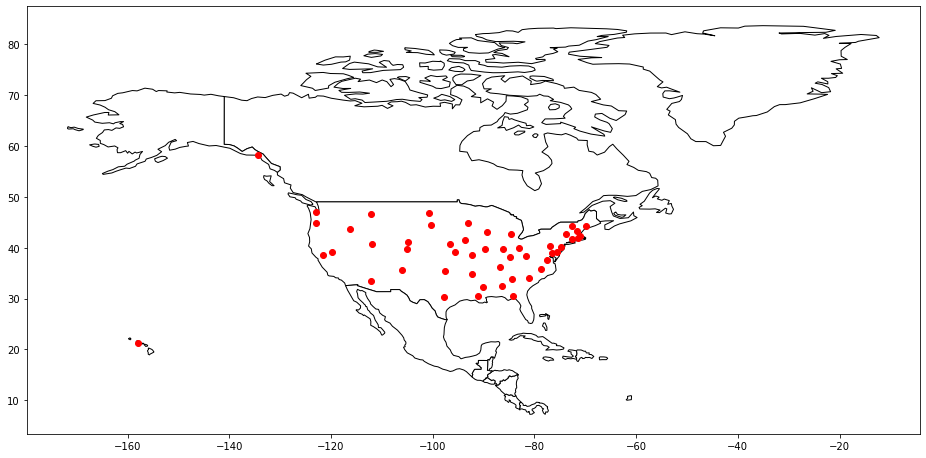

In [30]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

fig, ax1 = plt.subplots(figsize=(16,12))
world[world.continent == 'North America'].plot(ax=ax1,
    color='white', edgecolor='black')
gdf.plot(ax=ax1, color='red', figsize=(50,36))


plt.show()